In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CNN Project - Potato Disease Classification.ipynb',
 'Images',
 'PlantVillage',
 'PlantVillage-Splited',
 'Potato Disease Classification.ipynb',
 'Tensorflow Input Pipleline tf dataset.ipynb',
 'tf dataset with images.ipynb',
 'train test validation split.ipynb']

In [3]:
import os

path = "PlantVillage-Splited"

train_path = path+'/train'
val_path = path+'/val'
test_path = path+'/test'

os.listdir(train_path)

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [4]:
train_early = len(os.listdir(train_path+'/Potato___Early_blight'))
train_healtht = len(os.listdir(train_path+'/Potato___healthy'))
train_late = len(os.listdir(train_path+'/Potato___Late_blight'))
print(train_early,train_healtht,train_late)

800 121 800


In [5]:
train_early = len(os.listdir(val_path+'/Potato___Early_blight'))
train_healtht = len(os.listdir(val_path+'/Potato___healthy'))
train_late = len(os.listdir(val_path+'/Potato___Late_blight'))
print(train_early,train_healtht,train_late)

100 15 100


In [6]:
train_early = len(os.listdir(test_path+'/Potato___Early_blight'))
train_healtht = len(os.listdir(test_path+'/Potato___healthy'))
train_late = len(os.listdir(test_path+'/Potato___Late_blight'))
print(train_early,train_healtht,train_late)

100 16 100


In [7]:
train_paths = []
train_labels = []

for label in os.listdir(train_path):
    for image in os.listdir(train_path+'/'+label):
        train_paths.append(train_path+label+'/'+image)
        train_labels.append(label)

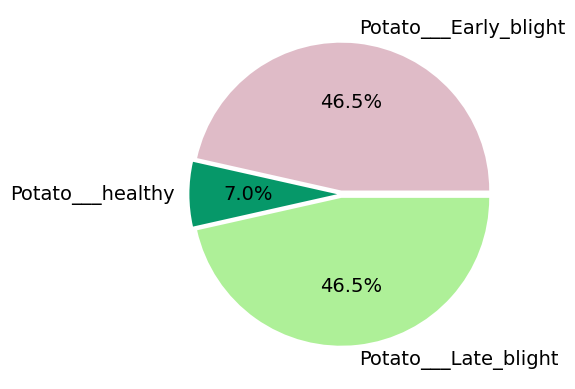

In [8]:
colors = ['#DFBBC7', '#069869', "#AEF098"]
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='Potato___Early_blight']),
         len([x for x in train_labels if x=='Potato___healthy']),
         len([x for x in train_labels if x=='Potato___Late_blight']),
        ],
        labels=['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025))
plt.show()

In [9]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


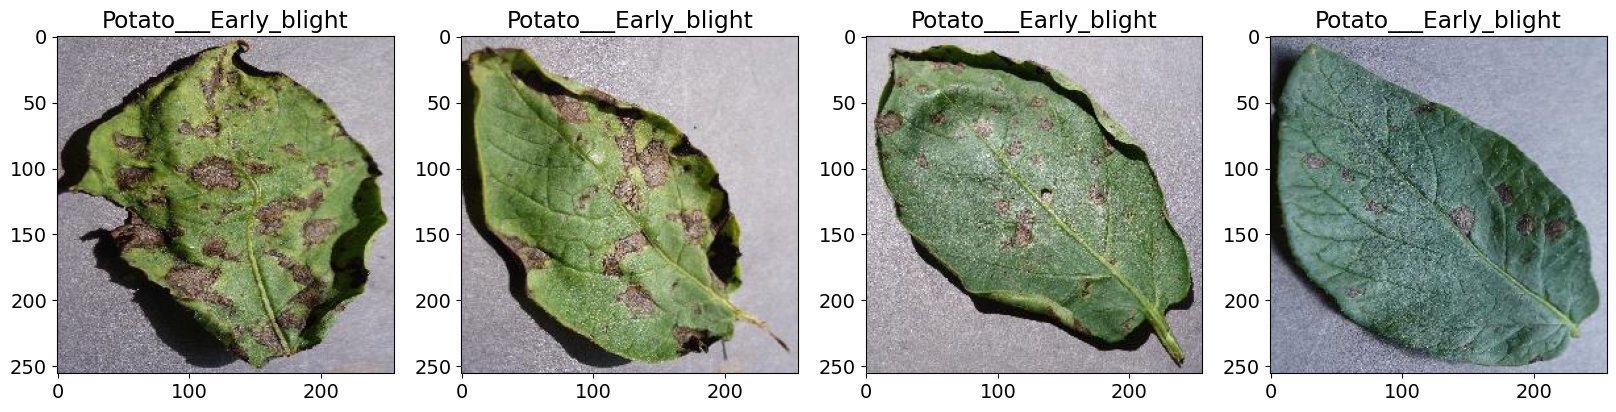

In [10]:
image_folder_path = train_path + '/Potato___Early_blight'
plot_image(image_folder_path, "Potato___Early_blight")

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


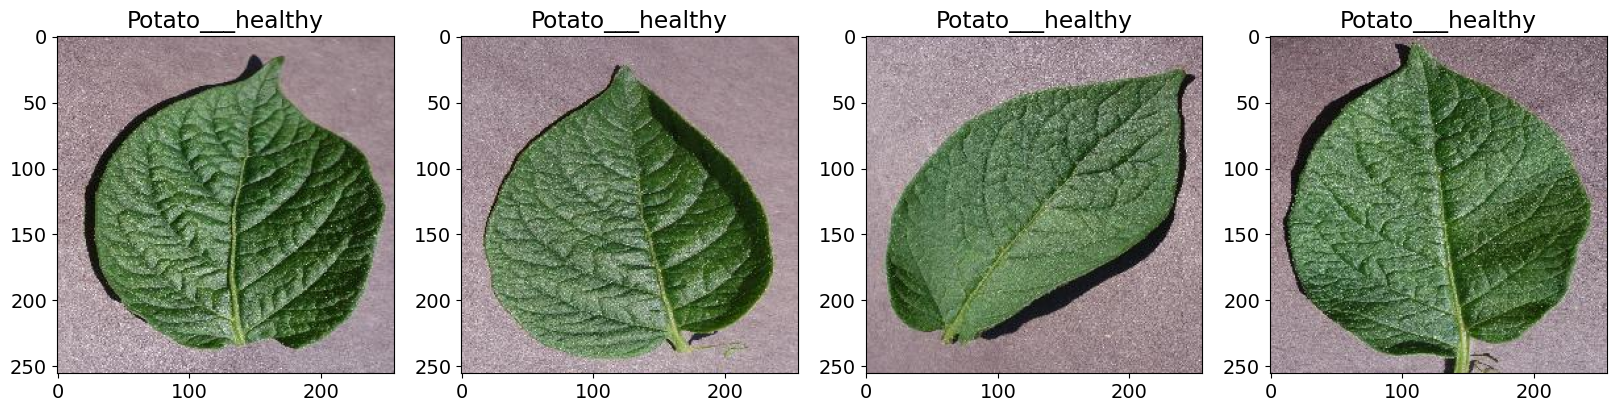

In [11]:
image_folder_path = train_path + '/Potato___healthy'
plot_image(image_folder_path, "Potato___healthy")

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


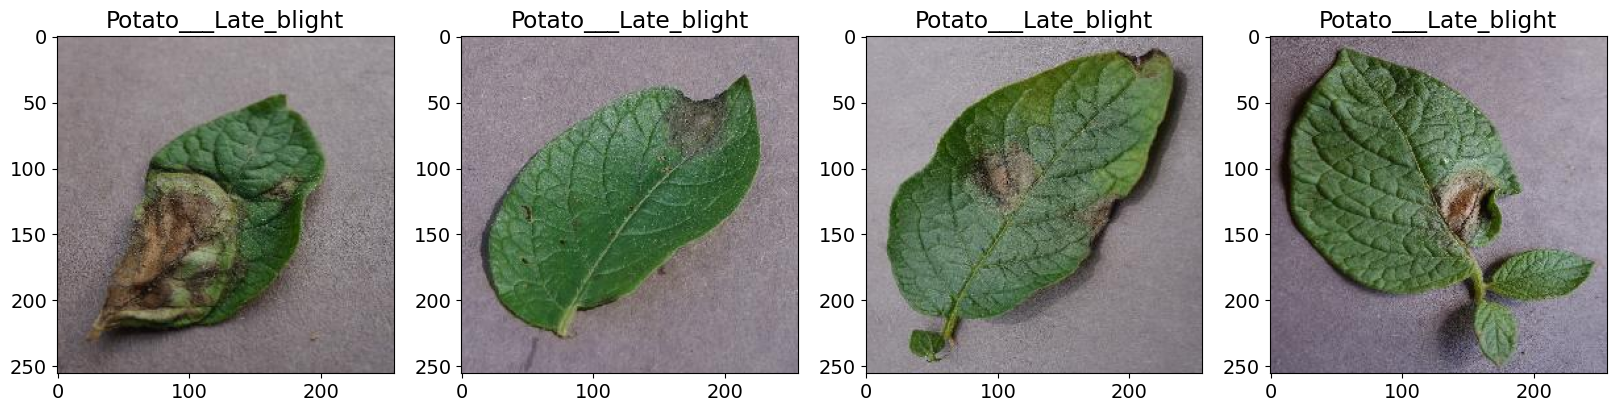

In [12]:
image_folder_path = train_path + '/Potato___Late_blight'
plot_image(image_folder_path, "Potato___Late_blight")

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [14]:
image_shape = (256,256,3)

train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='categorical')

val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical',
                                               shuffle=False)

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical',
                                               shuffle=False)

Found 1721 images belonging to 3 classes.
Found 215 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [15]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
results = model.fit(train_image_gen, epochs=10,
                    validation_data = val_image_gen,
                    batch_size=32)

Epoch 1/10
108/108 [==============================] - 212s 2s/step - loss: 1.0730 - accuracy: 0.5927 - val_loss: 0.6346 - val_accuracy: 0.7395
Epoch 2/10
108/108 [==============================] - 115s 1s/step - loss: 0.5003 - accuracy: 0.8030 - val_loss: 0.3390 - val_accuracy: 0.8558
Epoch 3/10
108/108 [==============================] - 117s 1s/step - loss: 0.3998 - accuracy: 0.8431 - val_loss: 0.3260 - val_accuracy: 0.8512
Epoch 4/10
108/108 [==============================] - 115s 1s/step - loss: 0.2687 - accuracy: 0.8954 - val_loss: 0.3127 - val_accuracy: 0.8930
Epoch 5/10
108/108 [==============================] - 120s 1s/step - loss: 0.2566 - accuracy: 0.8948 - val_loss: 0.1772 - val_accuracy: 0.9256
Epoch 6/10
108/108 [==============================] - 115s 1s/step - loss: 0.1974 - accuracy: 0.9262 - val_loss: 0.1015 - val_accuracy: 0.9674
Epoch 7/10
108/108 [==============================] - 119s 1s/step - loss: 0.1926 - accuracy: 0.9303 - val_loss: 0.1449 - val_accuracy: 0.9581

In [17]:
import pandas as pd
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

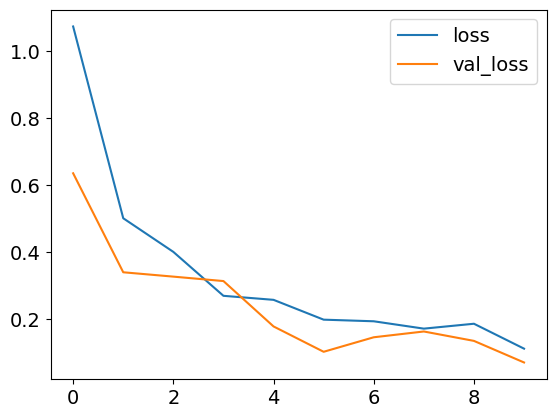

In [18]:
loss_df[['loss','val_loss']].plot()
plt.show()

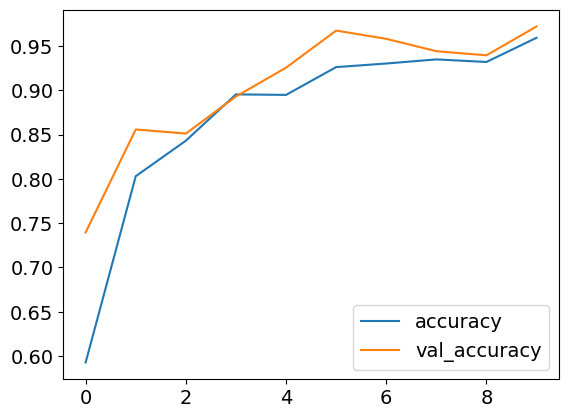

In [19]:
loss_df[['accuracy','val_accuracy']].plot()
plt.show()

In [20]:
model.evaluate(test_image_gen, verbose=0)

[0.11111751198768616, 0.9583333134651184]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
predicted_probs = model.predict(test_image_gen)
y_pred = np.argmax(predicted_probs, axis=1)
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

14/14 [==============================] - 4s 308ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.97      0.97      0.97       100
           2       0.87      0.81      0.84        16

    accuracy                           0.97       216
   macro avg       0.94      0.93      0.93       216
weighted avg       0.97      0.97      0.97       216

